# ANN implementation using the tensorflow

In [44]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [45]:
# Reading the dataset
df=pd.read_csv("Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## EDA

In [46]:
print(df.dtypes)
print("=========================================================================")
print("Shape of the dataset: ",df.shape)
print("=========================================================================")
print("Size of the dataset: ",df.size)
print("=========================================================================")
print(df.columns)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
Shape of the dataset:  (10000, 14)
Size of the dataset:  140000
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [48]:
# divid the dataset into dependent and input

X = df.iloc[:,3:13]
y = df.iloc[:,13]


In [49]:
# Checking the size of the X and y
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [50]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [51]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Feature engineering

    "Geography" and "Gender" are the Object type data. we need to convert them into the numerical.	

In [52]:
Geography = pd.get_dummies(X["Geography"],drop_first=True)
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [53]:
Gender = pd.get_dummies(X["Gender"],drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [54]:
# concatinate the var with data frame
X=X.drop(["Geography","Gender"],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [55]:
X=pd.concat([X,Geography,Gender],axis=1)

In [56]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [57]:
# Spliting the data set for train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

## Feature scalling

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)    # transform method to avoid the data linkage

In [59]:
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [60]:
X_test

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

## Building the ANN

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#from tensorflow.keras.layers import LeakyReLu, PReLU, ELu, ReLU
from tensorflow.keras.layers import Dropout

In [62]:
# initailizing the ANN
Classifire = Sequential()

In [63]:
# adding the input layer
Classifire.add(Dense(units=11,activation="relu"))

In [64]:
# adding the first hidden layer
Classifire.add(Dense(units=7,activation="relu"))

In [65]:
# adding the second hidden layer
Classifire.add(Dense(units=6,activation="relu"))

In [66]:
# adding the output layer
Classifire.add(Dense(1,activation="sigmoid"))

In [67]:
Classifire.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [68]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01) # By default it will take the learning rate,and we can also provide

In [69]:
Classifire.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [70]:
# Early stoping

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)



In [71]:
model_history=Classifire.fit(X_train,y_train,validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.4323 - accuracy: 0.8199 - val_loss: 0.3618 - val_accuracy: 0.8501
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8511 - val_loss: 0.3523 - val_accuracy: 0.8497
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.8559 - val_loss: 0.3453 - val_accuracy: 0.8531
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8546 - val_loss: 0.3473 - val_accuracy: 0.8501
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8569 - val_loss: 0.3499 - val_accuracy: 0.8573
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8614 - val_loss: 0.3478 - val_accuracy: 0.8576
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.8591 - val_loss: 0.3454 - val_accuracy:

In [72]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

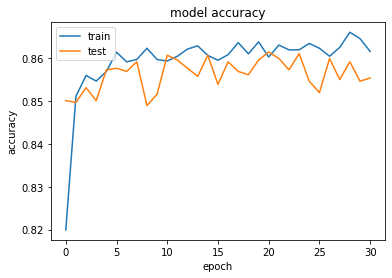

In [73]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

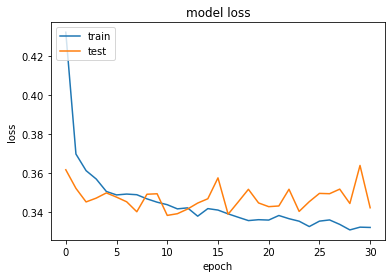

In [74]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making the predictions and evaluating the model

In [75]:
# Predicting the Test set results
y_pred = Classifire.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 2ms/step


## Making the Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1541,   44],
       [ 235,  180]], dtype=int64)

## Calculate the Accuracy

In [77]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8605

In [78]:
Classifire.get_weights()

[array([[ 1.6991571e-01, -1.7553826e-01, -1.2291520e-01,  4.1822228e-01,
         -7.5120407e-01, -3.3154988e-01, -1.2026129e-01, -1.9690669e-01,
         -1.0797478e+00, -2.4320084e-01, -3.4493867e-01],
        [ 4.0554944e-01,  2.4496710e+00, -9.1509771e-01, -5.5761898e-01,
          3.3606866e-01, -3.4060818e-01, -2.7074940e+00,  2.4398630e+00,
         -1.7115790e+00, -2.7131181e+00,  1.0609576e+00],
        [-1.1435625e-01,  7.2178388e-01,  8.3342034e-01, -4.3229949e-01,
         -1.0457165e+00, -6.9023037e-01,  6.6078752e-01, -1.6139116e-02,
          5.4769222e-02, -1.3850884e+00,  6.5994674e-01],
        [ 2.2370765e+00, -7.8414917e-01, -3.3067386e+00, -1.6594955e+00,
         -1.8557267e+00,  4.9266014e-01,  6.0888147e-01, -6.1926603e-01,
          1.8257047e-01, -5.9838456e-01,  1.4006264e+00],
        [-4.1552323e-01,  6.1378133e-01, -4.0886658e-01,  3.2643850e+00,
         -4.8922330e-01, -4.8286757e-01, -2.4192851e-02, -2.7422137e+00,
         -1.8538494e-01, -1.7937698e+0